<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/src/Hw4_BSM_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volatility calibration to BSM

## Abstract

- Goal
    - Calibrate BSM model for makert price of options


## Problem

All of pricing models require a set of model parameters in order to fully define the dynamics of each model. The process of adjusting model parameters such that the model prices are compatible with market prices is called **Calibration**. 

Input:

- market prices of several options with different strikes and maturities
- spot price
- interest rates

Output:

- Find volatility of BSM model

## Anal


Suppose
- Model prameter $\theta = (\theta_1, ... \theta_m)$ is a vector
- Prices of $n$ instruments are aviable in the market with its market price of $i$th instrument quoted by $C_i$. 
Let's denote $C = (C_1, ..., C_n)$ as a market price vector.
- In theory, $C_i^\theta$ is the model price of the $i$th instrument, and they are denoted as a vector $C^\theta = (C_1^\theta, ...,  C^\theta_n)$. 

Given a distance function $H: \mathbb R^n \times \mathbb R^n \mapsto \mathbb R^+$, calibration is to find the parameter $\theta^*$  which minimize the objective function $H(C^\theta, C)$, i.e.
$$ \theta^* = \arg\min_\theta H(C^\theta, C).$$

Commonly used distance functions for $H$ are 
- $H(x, y) = (\sum_{i=1}^n w_i |x_i - y_i|^p)^{1/p}.$
- $H(x, y) = (\sum_{i=1}^n w_i | \frac{x_i - y_i}{y_i}|^p)^{1/p}.$ If $p = 2$, $w_i =1$, then $H^2$ is called as SSRE (sum of squred relative errors)
- $H(x, y) = (\sum_{i=1}^n w_i |\ln x - \ln y|^p)^{1/p}.$

In this below, we are goint to use, the first case of $H$ with $p = 2$ and $w_i = 1$ for all i's.

# Hw Tasks

## Task-1

- Upload data from [here](https://github.com/songqsh/20s_ma573/blob/master/src/20optiondata2.dat) to your cloud platform
- Calibration/Performance:
  - Filter out 2-mon options and calibrate volatility using the distance function
$$H(x, y) = (\sum_{i=1}^n w_i |x_i - y_i|^2)^{1/2}.$$
  - Calibrated price for option means the computed option price using calibrated volatility and other parameters given by the market. Compare the market price and calibrated price using a plot of two curves: strike vs market (calibrated) price
- Do the same thing for the filter from 5-mon options.
- Which calibrated volatility is bigger, 2-mon or 5-mon?


## Task-2 (optional)
Please discuss the validity of the following statements:
- Given an underlying asset, options with shorter maturity can be better fitted than a longer maturity.
- Suppose Assest1(ex. AAPL) is more liquid than Asset2 (ex. TAL). Then Asset1 can be fit better than Asset2.

In [0]:
%cd~

!git clone https://github.com/Jun-629/20MA573.git 
pass

/root
Cloning into '20MA573'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 234 (delta 30), reused 0 (delta 0), pack-reused 170
Receiving objects: 100% (234/234), 254.41 KiB | 10.18 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [0]:
%cd 20MA573/src/
%ls

from bsm import *

/root/20MA573/src
bsm.py
hw1_grid_random_walk.ipynb
Hw2_finite_difference.ipynb
Hw2_pdf.ipynb
Hw3_bsm_price_change.ipynb
Hw3_Explicit_bsm_greeks.ipynb
Hw3_implied_volatility.ipynb
Hw3_payoff_structure_of_option_combinations.ipynb
Hw4_bsm_calibration.ipynb
Hw4_Monotonicity_in_Volatility.ipynb
optiondata.dat
Project_1.ipynb
Project_2.ipynb


In [0]:
np_option_data1 = np.loadtxt('optiondata.dat', comments='#', delimiter=',')

print('The data of 2-mon options will be shown as follows:')
print('>>>otype,         maturity, strike,       option_price')
print(np_option_data1[0:4])

The data of 2-mon options will be shown as follows:
>>>otype,         maturity, strike,       option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]]


In [0]:
np_option_data1 = np.loadtxt('optiondata.dat', comments='#', delimiter=',')

print('The data of 5-mon options will be shown as follows:')
print('>>>otype,         maturity, strike,       option_price')
print(np_option_data1[4:8])

The data of 5-mon options will be shown as follows:
>>>otype,         maturity, strike,       option_price
[[  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


In [0]:
num_row = np_option_data1.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data1[i,0],
      strike = np_option_data1[i,2],
      maturity = np_option_data1[i,1],
      market_price = np_option_data1[i,3]
  )   
  option_list.append(option1)

gbm = Gbm( init_state = 100., drift_ratio = .05, vol_ratio = .1)  

#expand one column for vol
np_option_data2 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)
#compute implied vols and add them into the last column
for i in range(num_row):
  np_option_data2[i,4] = implied_volatility(gbm, option_list[i])

IV = np_option_data2[0:8,4]
IV_2mon = np_option_data2[0:4,4]
IV_5mon = np_option_data2[4:8,4]

model_vol = np.arange(0.15, 0.5, 0.00005)
 
# Calculate different B-S price
c = 0
H_dist_2 = []
#BS_price_list = []
for i in range(len(model_vol)):
  a = 0
  for j in range(4):
    BS_price = Gbm(100., 0.05, model_vol[i]).bsm_price(option_list[j])
    a += (abs(BS_price - np_option_data1[j,3]))**2
    #BS_price_list.append(BS_price)
  c = np.sqrt(a)
  H_dist_2.append(c)
min_vol_2 = model_vol[H_dist_2.index(min(H_dist_2))]
print('>>> The calibrate volatility of 2 months is ' + str(min_vol_2))

c5 = 0
H_dist_5 = []
for i in range(len(model_vol)):
  a5 = 0
  for j in range(4):
    BS_price_5 = Gbm(100., 0.05, model_vol[i]).bsm_price(option_list[j+4])
    a5 += (abs(BS_price_5 - np_option_data1[j+4,3]))**2
  c5 = np.sqrt(a5)
  H_dist_5.append(c5)  
min_vol_5 = model_vol[H_dist_5.index(min(H_dist_5))]
print('>>> The calibrate volatility of 5 months is ' + str(min_vol_5))

if (min_vol_2 > min_vol_5):
  print('calibrated volatility of 2-mon is bigger')
else:
  print('calibrated volatility of 5-mon is bigger')

>>> The calibrate volatility of 2 months is 0.18109999999999657
>>> The calibrate volatility of 5 months is 0.18399999999999625
calibrated volatility of 5-mon is bigger


In [0]:
def h(x):
  gbm_h = Gbm(100.,0.05,x)
  inner = 0
  for i in range(4):
    black_price = gbm_h.bsm_price(option_list[i])
    inner += (abs(black_price - np_option_data1[i,3]))**2
  h = np.sqrt(inner)
  return h

print ('>>> The calibrate volatility of 2 months is ' + str(so.fmin(h,0.9)))

def g(x):
  gbm_g = Gbm(100.,0.05,x)
  inner_g = 0
  for i in range(4):
    black_price_g = gbm_g.bsm_price(option_list[i+4])
    inner_g += (abs(black_price_g - np_option_data1[i+4,3]))**2
  g = np.sqrt(inner_g)
  return g

print ('>>> The calibrate volatility of 5 months is ' + str(so.fmin(g,0.9)))

c_v_2 = so.fmin(h,0.9)
c_v_5 = so.fmin(g,0.9)

if (c_v_2 > c_v_5):
  print('>>> Calibrated volatility of 2-mon is bigger')
else:
  print('>>> Calibrated volatility of 5-mon is bigger')

Optimization terminated successfully.
         Current function value: 0.234280
         Iterations: 16
         Function evaluations: 32
>>> The calibrate volatility of 2 months is [0.18114258]
Optimization terminated successfully.
         Current function value: 0.811653
         Iterations: 16
         Function evaluations: 32
>>> The calibrate volatility of 5 months is [0.18395508]
Optimization terminated successfully.
         Current function value: 0.234280
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.811653
         Iterations: 16
         Function evaluations: 32
>>> Calibrated volatility of 5-mon is bigger


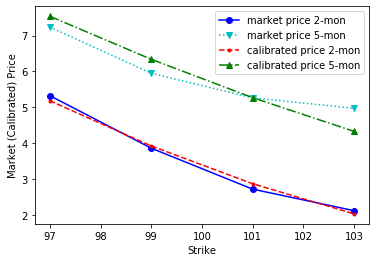

In [0]:
gbm_cv2 = Gbm(100.,0.05,c_v_2)
option_cv2 = []

for i in range(4):
  bs_cv_price = gbm_cv2.bsm_price(option_list[i])
  option_cv2.append(bs_cv_price)

gbm_cv5 = Gbm(100.,0.05,c_v_5)
option_cv5 = []

for i in range(4):
  bs_cv_price = gbm_cv5.bsm_price(option_list[i+4])
  option_cv5.append(bs_cv_price)  

k = np_option_data1[0:4,2]
mak_prc2 = np_option_data1[0:4,3]
mak_prc5 = np_option_data1[4:8,3]

plt.plot(k, mak_prc2,'bo-', label='market price 2-mon')
plt.plot(k, mak_prc5,'cv:', label='market price 5-mon')
plt.plot(k,option_cv2,'r.--', label='calibrated price 2-mon')
plt.plot(k,option_cv5,'g^-.', label='calibrated price 5-mon')
plt.xlabel('Strike')
plt.ylabel('Market (Calibrated) Price')
plt.legend()
